<H1>LLM-Based Fake News Detection Project</H1>

Develop a fake news detection system using LLMs and prompt engineerig, optimising both for accuracy and efficiency using real-world datasets.

In [64]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [65]:
# Loading LIAR Dataset
liar_train = pd.read_csv('train.tsv', delimiter='\t', header=None)
liar_test = pd.read_csv('test.tsv', delimiter='\t', header=None)
liar_validate = pd.read_csv('valid.tsv', delimiter='\t', header=None)

In [66]:
# Rename Column
col_name = ['json_id', 'label', 'statement','subject', 'speaker', 'speaker_job','state', 'party', 'barely_true','fasle','half_true', 'mostly_true', 'pants_on_fire','context']

liar_train.columns = col_name
liar_test.columns = col_name
liar_validate.columns = col_name

In [67]:
# Loading FakeNewsNet Dataset - Politics
# Assign fake (0) and real (1)

fakenews_politi_fake = pd.read_csv('politifact_fake.csv')
fakenews_politi_fake['label'] = 'fake'

fakenews_politi_real = pd.read_csv('politifact_real.csv')
fakenews_politi_real['label'] = 'real'

fakenews_politi = pd.concat([fakenews_politi_real,fakenews_politi_fake])
fakenews_politi.head()

,id,news_url,title,tweet_ids,label
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...,real
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...,real
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN,real
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN,real
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...,real


In [68]:
# Loading FakeNewsNet Dataset - Gossips
# Assign fake (0) and real (1)

fakenews_gossip_fake = pd.read_csv('gossipcop_fake.csv')
fakenews_gossip_fake['label'] = 'fake'

fakenews_gossip_real = pd.read_csv('gossipcop_real.csv')
fakenews_gossip_real['label'] = 'real'

fakenews_gossip = pd.concat([fakenews_gossip_real,fakenews_gossip_fake])
fakenews_gossip.head()

,id,news_url,title,tweet_ids,label
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...,real
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...,real
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...,real
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...,real
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...,real


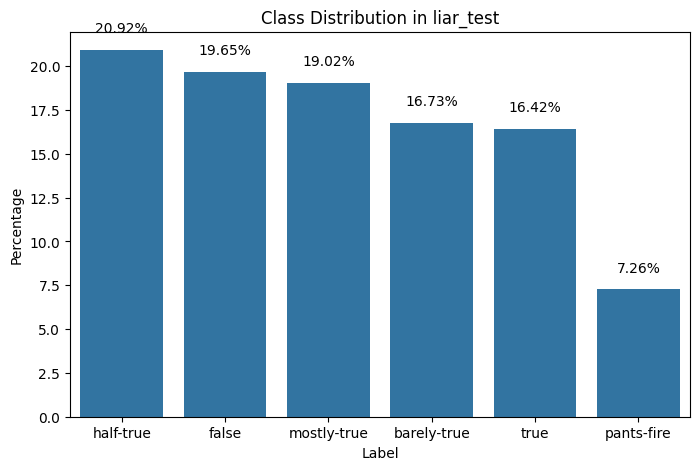

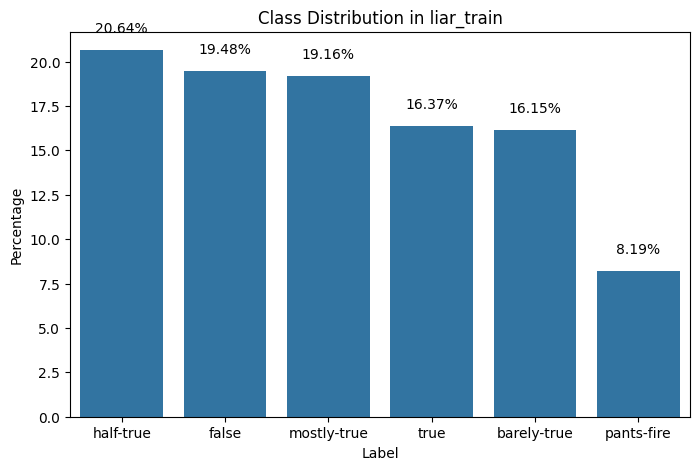

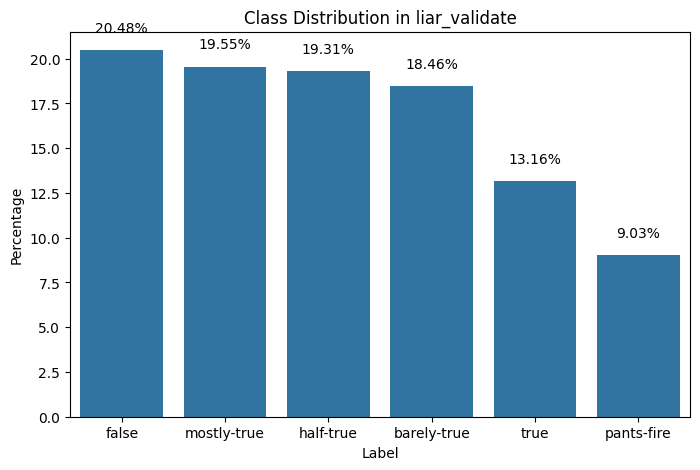

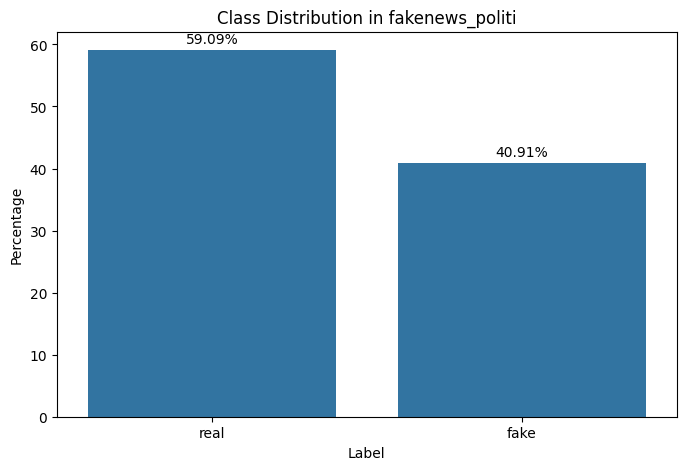

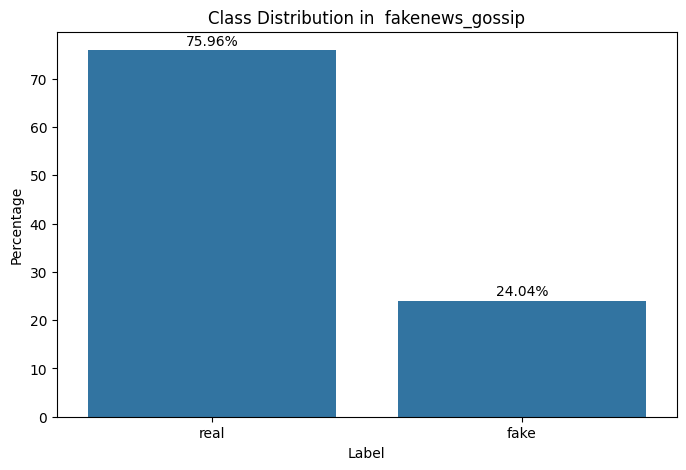

In [69]:
# Visualize Class Distribution from each dataset

datasets = [liar_test, liar_train, liar_validate, fakenews_politi, fakenews_gossip]
names = ['liar_test', 'liar_train', 'liar_validate', 'fakenews_politi',' fakenews_gossip']

# Iterate through each dataframe and visualize label distribution
for df, name in zip(datasets, names):
    plt.figure(figsize=(8, 5))
    label_counts = df['label'].value_counts(normalize=True) * 100  # Get percentage
    
    # Create bar plot
    sns.barplot(x=label_counts.index, y=label_counts.values)
    
    # Add labels and title
    plt.title(f'Class Distribution in {name}')
    plt.ylabel('Percentage')
    plt.xlabel('Label')
    
    # Annotate bars with percentage values
    for i, value in enumerate(label_counts.values):
        plt.text(i, value + 1, f'{value:.2f}%', ha='center', fontsize=10)
    
    plt.show()